In [4]:
!python3 -m pip install paddlepaddle-gpu paddleocr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.4/88.4 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 407.5/407.5 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 21.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 32.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 72.3 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.6.0-py2.py3-none-any.whl size=117030 sha256=ac038be360013a0c9f5aa1250e3221a48f8e2dd4a19db1c8e6145b2dad1d3ccd
  Stored in directory: /root/.cache/pip/wheels/d6/6d/5d/5b73fa0f46d01a793713f8859201361e9e581ced8c75e5c6a3
Successfully built fire


In [5]:
!pip install paddlepaddle-gpu

In [48]:
from paddleocr import PaddleOCR, draw_ocr
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from PIL import ImageFont, ImageDraw, Image

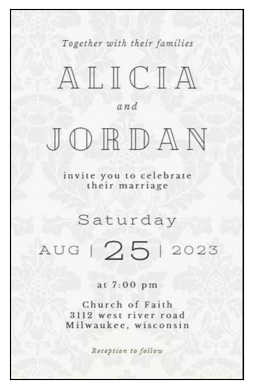

In [11]:
img = cv2.imread('wedding card.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.xticks([])
plt.yticks([])
plt.imshow(img)

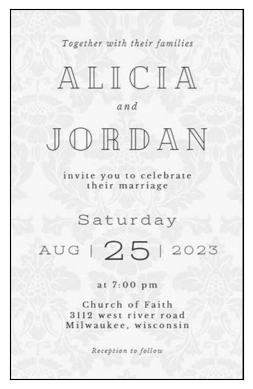

In [17]:
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.xticks([])
plt.yticks([])
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

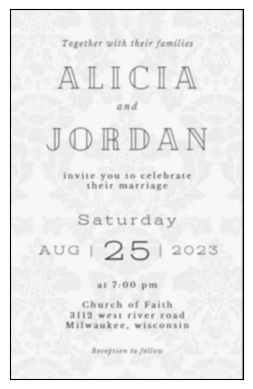

In [18]:
blur = cv2.GaussianBlur(gray, (5, 5), 0)
plt.xticks([])
plt.yticks([])
plt.imshow(cv2.cvtColor(blur, cv2.COLOR_BGR2RGB))

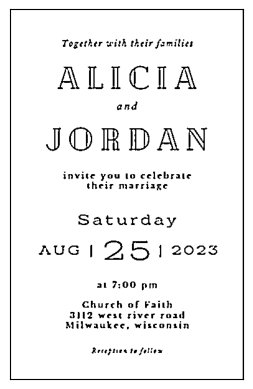

In [25]:
threshold = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 12)
plt.xticks([])
plt.yticks([])
plt.imshow(cv2.cvtColor(threshold, cv2.COLOR_BGR2RGB))

In [26]:
paddle = PaddleOCR(use_angle_cls=True, lang='en')
result = paddle.ocr(threshold)

download https://paddleocr.bj.bcebos.com/PP-OCRv3/english/en_PP-OCRv3_det_infer.tar to /root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer/en_PP-OCRv3_det_infer.tar


100%|██████████| 4.00M/4.00M [00:17<00:00, 226kiB/s] 


download https://paddleocr.bj.bcebos.com/PP-OCRv4/english/en_PP-OCRv4_rec_infer.tar to /root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer/en_PP-OCRv4_rec_infer.tar


100%|██████████| 10.2M/10.2M [00:18<00:00, 560kiB/s] 


download https://paddleocr.bj.bcebos.com/dygraph_v2.0/ch/ch_ppocr_mobile_v2.0_cls_infer.tar to /root/.paddleocr/whl/cls/ch_ppocr_mobile_v2.0_cls_infer/ch_ppocr_mobile_v2.0_cls_infer.tar


100%|██████████| 2.19M/2.19M [00:07<00:00, 291kiB/s]

[2024/08/28 15:18:56] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_c

[2024/08/28 15:18:57] ppocr DEBUG: dt_boxes num : 13, elapsed : 0.26157402992248535
[2024/08/28 15:18:58] ppocr DEBUG: cls num  : 13, elapsed : 0.08407044410705566
[2024/08/28 15:19:00] ppocr DEBUG: rec_res num  : 13, elapsed : 2.447261095046997


In [47]:
for line in result:
    print(str(line) + '\n')


[[[[83.0, 47.0], [294.0, 47.0], [294.0, 64.0], [83.0, 64.0]], ('Together with their famities', 0.7761996984481812)], [[[78.0, 93.0], [295.0, 93.0], [295.0, 127.0], [78.0, 127.0]], ('ALICIA', 0.9971333146095276)], [[[169.0, 147.0], [206.0, 144.0], [208.0, 164.0], [171.0, 167.0]], ('and', 0.9975666999816895)], [[[61.0, 191.0], [315.0, 191.0], [315.0, 227.0], [61.0, 227.0]], ('JORDAN', 0.9457268118858337)], [[[85.0, 260.0], [290.0, 260.0], [290.0, 276.0], [85.0, 276.0]], ('invite you to celebrale', 0.9267317056655884)], [[[123.0, 276.0], [254.0, 278.0], [253.0, 292.0], [122.0, 290.0]], ('their marriage', 0.967722475528717)], [[[108.0, 325.0], [268.0, 330.0], [267.0, 353.0], [108.0, 349.0]], ('Saturday', 0.9991276264190674)], [[[45.0, 373.0], [335.0, 373.0], [335.0, 403.0], [45.0, 403.0]], ('Aug 12 512023', 0.7851778864860535)], [[[138.0, 436.0], [238.0, 436.0], [238.0, 453.0], [138.0, 453.0]], ('al 7:00 pm', 0.911711573600769)], [[[115.0, 468.0], [261.0, 468.0], [261.0, 484.0], [115.0, 48